In [ ]:
# Install the required libraries
!pip install -U scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

## Import the required libraries


In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


## Importing the Dataset


In [3]:
data = pd.read_csv('bike_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 1. About the Data


## Main objective of the analysis

The main objective of this analysis is to predict daily bike rental counts based on weather, seasonal, and temporal factors. Additionally, we aim to identify the key drivers that impact bike rental usage.

## Description of dataset and attributes

***Brief Description:***

The dataset contains daily bike rental information over a two-year period, including attributes related to time, weather conditions, and user demand.

***Summary of Attributes:***

*The dataset has the following key columns:*

**Date Variables:**

dteday: The date of the observation.

season: Season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

yr: Year (0: 2011, 1: 2012).

mnth: Month (1–12).

weekday: Day of the week (0–6).

workingday: Whether the day is a working day (1: Yes, 0: No).

holiday: Whether the day is a holiday (1: Yes, 0: No).


**Weather Variables:**

weathersit: Weather situation (1: Clear, 2: Misty, 3: Light rain/snow, 4: Heavy rain/snow).

temp: Normalized temperature (0–1 scale).

atemp: Normalized "feels like" temperature.

hum: Normalized humidity (0–1 scale).

windspeed: Normalized wind speed (0–1 scale).


**Target Variable:**

cnt: Total bike rental count for the day.

**Other Counts:**

casual: Count of casual users.

registered: Count of registered users.

The dataset contains 731 rows and 16 columns, capturing daily bike rental counts over 2011 and 2012, alongside features related to time, weather, and usage patterns. The target variable for our analysis is cnt, the total daily bike rentals.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 2. Objectives


The main objective of this analysis is to predict daily bike rental counts based on weather, seasonal, and temporal factors. Additionally, we aim to identify the key drivers that impact bike rental usage.

Predictive variables:

- instant         int64
- dteday         object
- season          int64
- yr              int64
- mnth            int64
- holiday         int64
- weekday         int64
- workingday      int64
- weathersit      int64
- temp          float64
- atemp         float64
- hum           float64
- windspeed     float64
- casual          int64
- registered      int64

Objective variable:
- cnt             int64  (Daily bike rental counts)

# 3.Data Cleaning and Feature Engineering

Skewness: -0.047353


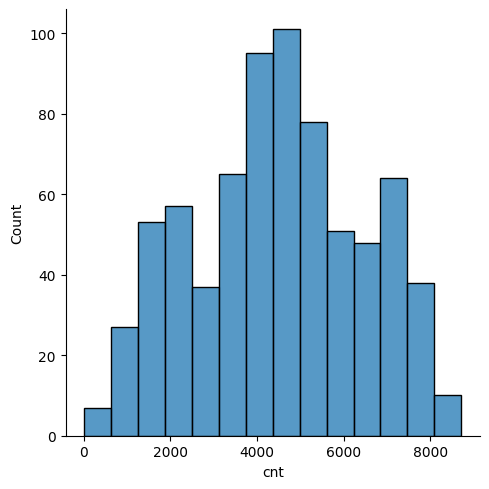

In [12]:
sp_untransformed = sns.displot(data['cnt'])
print("Skewness: %f" % data['cnt'].skew())

No need to log-transfom since the variable is normally distributed (skewness < 0.05)

In [ ]:
duplicate = data[data.duplicated()]
duplicate

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


No duplicates in any column

Text(0.5, 1.0, 'Total Missing Values')

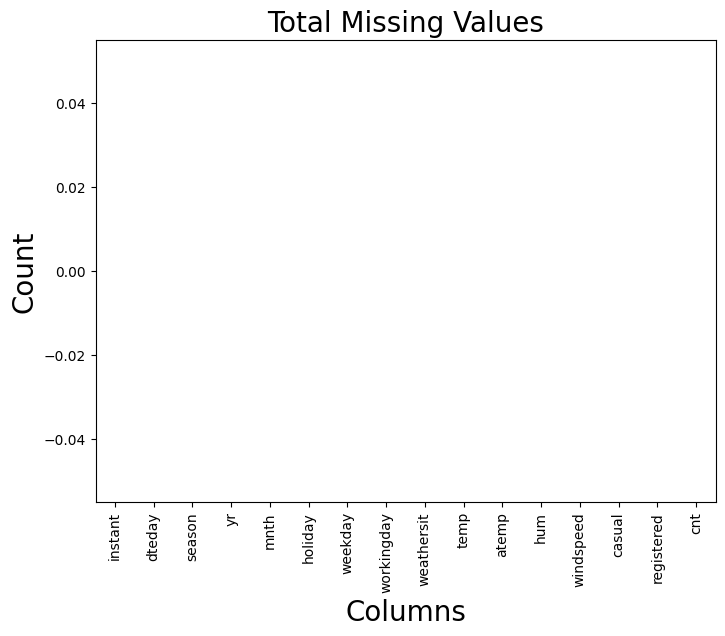

In [15]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

No missing values

<Axes: xlabel='cnt'>

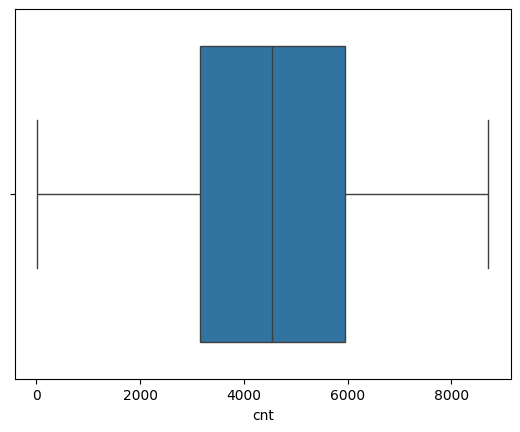

In [16]:
sns.boxplot(x=data['cnt'])

No outliers

In [21]:
# Convert the 'dteday' column to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract day of the month
data['mnthday'] = data['dteday'].dt.day
# Drop the original 'dteday' column
data.drop(columns=['dteday'], inplace=True)

In [22]:
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnthday
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
 15  mnthday     731 non-null    int32  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.6 KB


As we already have month and year in our dataset, we just need to extract the day of the month from the datetime variable ('dteday'), and then we drop this column, of object type, to be able to train the linear regression models in our data later.

# 4. Linear Regression Models


First, let's split our data into `X` features and `y` target.

In [24]:
X = data.drop('cnt', axis=1)
y = data.cnt

Now, we split our data, using <code>train_test_split</code> function, into the training and testing sets, allocating 30% of the data for testing.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 220
number of training samples: 511


Let's create a <code>LinearRegression</code> object, called `lm`. Then, we fit the model with multiple features on our X_train and y_train data. Finally, we apply `predict(`) function on the testing data set.

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predicted = lm.predict(X_test)

In [27]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  1.0
R^2 on testing data  1.0


We have obtained a perfect score in the linear model, so now the next step is to check which features are the ones that influence the most the bike rental counts, so we obtain the coefficients for that.

In [28]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lm.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

       Feature   Coefficient
13  registered  1.000000e+00
12      casual  1.000000e+00
9        atemp  6.866765e-12
11   windspeed  7.128384e-13
0      instant  2.922684e-14
5      weekday -9.597010e-15
14     mnthday -3.098772e-14
6   workingday -2.489246e-13
4      holiday -2.585523e-13
10         hum -4.600433e-13
7   weathersit -4.705458e-13
3         mnth -6.859374e-13
1       season -8.759660e-13
8         temp -4.861369e-12
2           yr -1.005794e-11


As we can see, the features that influence the most (with great difference) are registered an casual, indicating that the rental counts are very dependent on the status of the customer.

In [40]:
# Check for correlation between features and the target
correlations = data.corr()
print(correlations['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
mnthday      -0.024204
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


The feature 'registered' is indicating data leakage. Data leakage occurs when the model inadvertently uses information that it shouldn't have during training, like perfect correlation with the target (registered = 0.94). So, we remove (drop) it from the dataset and repeat the whole process again.

In [53]:
# 'casual' and 'registered' are highly correlated with 'cnt', remove them
X = data.drop(columns=['registered', 'cnt'])
y = data['cnt']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 220
number of training samples: 511


In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predicted = lm.predict(X_test)

In [56]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.8900675200126388
R^2 on testing data  0.8933955268395046


Now, we see a score that is much normal and we can work about. So, after having the score for the regular linear regression, we go for a polynomial regression model.

In [58]:
Input=[ ('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [59]:
param_grid = {
    "polynomial__degree": [1, 2, 3, 4, 5]
}

In [60]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [61]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [62]:
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3, 4, 5]})

In [63]:
best=search.best_estimator_
best

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [64]:
print("best_params_: ",search.best_params_)

best_params_:  {'polynomial__degree': 1}


In [65]:
best.score(X_test,y_test)

0.9045476137047326

We obtained a very nice score. We will go now for Regularization Regression (both Lasso and Ridge)

In [94]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)

In [95]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([6081.62450324, 1655.20026341, 3621.06151031, 5793.71292017,
       6582.62664471, 6957.43984094,  906.18365785, 2292.06532769,
       7742.8003773 , 6232.73242407, 1617.18163835, 2277.26245667,
       4269.47768461, 4794.29440882, 2557.96562455, 2449.51389348,
       2612.76073472, 8160.81942524, 5507.71787936, 2260.17263323,
       7150.91897289, 6713.32202705, 5569.32009289, 1930.18092777,
       1370.94926624, 4992.12606614, 2050.95791167, 6928.78975688,
       4068.59651946, 5511.88109323, 2491.61840999, 4132.72418509,
       5787.53505026, 6690.0377441 , 5931.4196854 , 4431.39098131,
       7323.72899787, 6143.4579131 , 2935.94878042,  813.77016205,
       4025.5500428 , 4125.32992579, 7101.75813771, 3974.12570944,
       7142.34791967, 2563.79666296, 4959.38714808, 5540.18574567,
       6482.67929077, 4566.37853494, 4271.08321752, 2078.11119561,
       1174.78461278, 4838.94357489, 4721.15249059, 4556.28171542,
       3638.15767828, 2809.49205403, 5134.89349549, 7199.41558

In [96]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.9179535614371637
R^2 on testing data  0.9162516323946392


In [99]:
param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5, 6],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [100]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=1, tol=0.2))]),
             n_jobs=1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4, 5, 6]})

In [101]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=10, tol=0.2))])

In [102]:
best.score(X_test,y_test)

0.938798742554294

In [103]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.9154212722732552
best_params_:  {'model__alpha': 10, 'polynomial__degree': 6}


Even better score! Using an alpha value of 1 and a polynomial degree of 6, we obtained the perfect model, with the best score, being 0.938798. Let's work right now with Ridge Regression

In [104]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [105]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([6664.17375923, 1471.36448856, 3268.64221633, 5699.25799671,
       6947.82119753, 6989.65143207, 1214.1821092 , 2816.59906118,
       7638.94618192, 6326.75103941,  607.53305952, 3232.02166871,
       4624.35622328, 4379.04164613, 2793.79833011, 3085.21008504,
       2753.67874885, 8188.25238329, 4974.3380582 , 1917.92404202,
       7699.27341551, 6216.37845982, 5401.32372879, 1988.31419102,
       1819.95733935, 5401.5763897 , 2112.46205983, 7244.81445533,
       3791.27084311, 5700.27280377, 2615.96307995, 4156.84184428,
       6003.78870547, 6934.97732704, 5875.57039826, 4196.60613477,
       7593.45984251, 6414.71128254, 2921.08172606, 1038.30734232,
       4045.9805817 , 4022.64940571, 7227.19285698, 4271.18776759,
       7166.7382306 , 2195.96310807, 4655.3588143 , 5660.52502574,
       7112.64206959, 4724.21498034, 5994.56166035, 1743.0108216 ,
       1720.42647303, 4457.02540947, 4870.59697397, 4892.29747146,
       3068.77280805, 3105.54823851, 5147.75146032, 7058.77128

In [106]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.9514077644876314
R^2 on testing data  0.9210491978856061


In [107]:
param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [108]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4, 5]})

In [109]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

In [110]:
best.score(X_test,y_test)

0.9387722707739888

In [111]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.9144214439165858
best_params_:  {'model__alpha': 10, 'polynomial__degree': 4}


Using ridge, the best score was 0.938772 with an alpha=10 and degree=4, sligthly worse than using Lasso Regression. Now let's finish the models with an Elastic-Net model, following the same workflow.

In [112]:
param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10],
    "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]
}
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',ElasticNet(tol= 0.2))]
pipe = Pipeline(Input)

In [ ]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)
search.fit(X_train, y_train)
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('ss', StandardScaler()),
                ('model', ElasticNet(alpha=1, l1_ratio=0.75, tol=0.2))])

In [114]:
print(best.score(X_test,y_test))
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

0.9425313464033789
best_score_:  0.919187831179579
best_params_:  {'model__alpha': 1, 'model__l1_ratio': 0.75, 'polynomial__degree': 5}


As we can see, the best model was Elastic Net with a score of 0.94, with the parameters indicated above.

# 5. Insights and key findings


After training and evaluating multiple regression models, the Elastic Net model emerged as the best-performing one with an 
𝑅
2
R 
2
  score of 0.94. This model combines the strengths of Lasso and Ridge regularization, balancing feature selection and penalization of overly complex models. The hyperparameters tuned during the training process were:

- Alpha: 1
- L1 Ratio: 0.75
- Polynomial Degree: 5

The use of polynomial features (degree 5) allowed the model to capture non-linear relationships, significantly improving its predictive performance.

In [118]:
elastic_net_model = best.named_steps['model']
transformed_feature_names = best.named_steps['polynomial'].get_feature_names_out(X_train.columns)
coefficients = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Coefficient': elastic_net_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

               Feature  Coefficient
9                atemp   322.633824
12              casual   294.180046
2                   yr   293.951963
8                 temp   284.033115
0              instant   246.115951
..                 ...          ...
21  instant weathersit   -65.647830
24         instant hum   -67.628380
34   season weathersit   -84.404606
11           windspeed   -96.251603
7           weathersit  -101.983795

[11627 rows x 2 columns]


Among the predictors, the following were identified as the most influential drivers of bike rental counts:

atemp (Feels-like Temperature): This feature represents the "feels-like" temperature, which accounts for perceived temperature rather than the actual recorded temperature. It shows a strong positive influence on rental counts, indicating that comfortable weather conditions drive more bike usage.

casual (Casual User Rentals): The count of casual users (those without a registered membership) strongly correlates with the total bike rentals.

yr (Year): This indicates the year of the observation (e.g., 0 for 2011, 1 for 2012). The positive coefficient suggests an increase in bike rentals over time, likely reflecting growing popularity or improved infrastructure.

temp (Temperature): The actual temperature in normalized form, showing a strong positive correlation with bike rentals. Warmer weather generally encourages outdoor activities, increasing bike usage.

The Elastic Net model effectively captured these patterns while avoiding overfitting, thanks to the regularization mechanisms.

# 6. Next Steps


### Data Enhancements:

**Additional Features**: Consider incorporating external factors, such as public events, holidays, or traffic data, which might further explain fluctuations in bike rentals.

**Station-Level Data**: Analyzing rentals at the station level could provide localized insights and improve the model’s granularity.

**Time of Day**: Including hourly data could reveal rental peaks and enhance prediction accuracy for different times of the day.

### Model Improvements:

**Explore Non-Linear Models**: Tree-based algorithms like Random Forests or Gradient Boosting could be used to model non-linear relationships more naturally.

**Cross-Validation**: Increase the robustness of the model by using more folds during cross-validation.

**Feature Interactions**: Investigate potential interactions between features, such as the combined effects of temperature and season.

**Validation with New Data:** Test the model on unseen data or future rentals to validate its performance over time.